# 6.3 순환 신경망의 고급 사용법

이 절에서는 순환 신경망의 고급 사용법을 기온 예측 문제를 통해 설명함

### 순환 신경망의 성능과 일반화 능력을 향상시키기 위한 3가지 고급 기법

1. **순환 드롭아웃(recurrent dropout)**

    순환 층에서 overfitting을 방지


2. **스태킹 순환 층(stacking recurrent layer)**

    네트워크의 표현 능력(representation power)을 증가시킴(계산비용도 증가)


3. **양방향 순환 층(bidirectional recurrent layer)**

    정확도를 높이고 기억을 좀 더 오래 유지시킴

## 6.3.1 기온 예측 문제

- 날씨 시계열 데이터셋
    - `$ wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip`
- 마지막 데이터 포인트에서 24시간 이후의 온도를 예측하는 문제
- 시계열 데이터에서 일반적으로 나타나는 여러가지 어려운 점을 가지고 있음

In [16]:
# 데이터셋 분석

import os 

data_dir = './datasets/climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')


# f = open(fname)
# data = f.read()
# f.close()
with open(fname) as f:
    data = f.read()
    

lines = data.split('\n')
headers = lines[0].split(',')
lines = lines[1:]

print("총 데이터 수 :", len(lines))
print(headers)

총 데이터 수 : 420551
['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [45]:
# numpy array로 바꾸기

import numpy as np

# "Date Time" column 제외
float_data = np.zeros((len(lines), len(headers)-1))

for i, line in enumerate(lines):
    float_data[i, :] = [float(x) for x in line.split(',')[1:]]
    
print(float_data.shape)
print(float_data[0])

(420551, 14)
[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


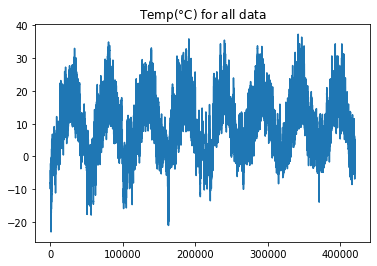

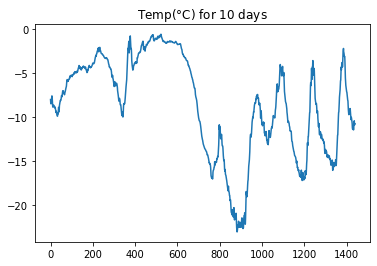

In [67]:
# 온도(섭씨) 데이터 그래프 그리기

import matplotlib.pyplot as plt

# 전체 온도 데이터
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.title("Temp($\degree$C) for all data")

plt.figure()

# 첫 10일간의 온도
temp = float_data[:1440, 1]
plt.plot(range(len(temp)), temp)
plt.title("Temp($\degree$C) for 10 days")

plt.show()

#### 그래프 분석
- 전체 데이터
    - 연간 온도에 주기성이 있고 안정적임
    - **연간 데이터는 안정적이므로 지난 몇 달간의 데이터로 다음 달의 평균 온도를 예측하기는 쉬움**
- 10일간 데이터
    - 일별 온도에 주기성이 있지만 불안정함(마지막 4일간만 그나마 안정적으로 보임)
    - **일간 데이터는 불안정적이므로 다음 날의 온도 예측은 어려움**